# Analysis of barren plateaus in the FI loss landscape
Data: The data is 500 samples of the $\mathcal{F}(\varphi)$ and $\nabla \mathcal{F}(\varphi)$, with circuit parameters drawn from a uniform distribution.
The number of qubits, $n$, and the circuit depth, $k$, are swept over the range $n, k \in [1, 8]$ (all possible combinations).

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm

from queso.io import IO

In [6]:
def load_data(io, ns, ks):
    data = {}
    for n in ns:
        _d = {}
        for k in ks:
            fid = io.path.joinpath(f'n={n}_k={k}.pkl')
            if fid.is_file():
                _df = io.load_dataframe(fid.stem)
            else:
                _df = None

            _d[k] = _df
        data[n] = _d


    return data

io = IO(folder=r"pure_qfi_batch_sweep/cnot_2local_ansatz/samples", verbose=False)
ns = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12]
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data = load_data(io, ns, ks)

In [7]:
for n in ns:
    for k in ks:
        df = data[n][k]
        if df is None:
            print(f"missing {n}, {k}")
        # print(f"n={n}, k={k} | {df.size if df is not None else 'NA'}")
print(df)

    n   k                                               vals  \
0  12  12  [5.972073044740857, 6.324111903972242, 5.90714...   

                                               grads fi_name            t  
0  [[[0.11115330225759917, -0.09935708107942133, ...     qfi  3489.586779  
    n   k                                               vals  \
0  12  12  [5.972073044740857, 6.324111903972242, 5.90714...   

                                               grads fi_name            t  
0  [[[0.11115330225759917, -0.09935708107942133, ...     qfi  3489.586779  


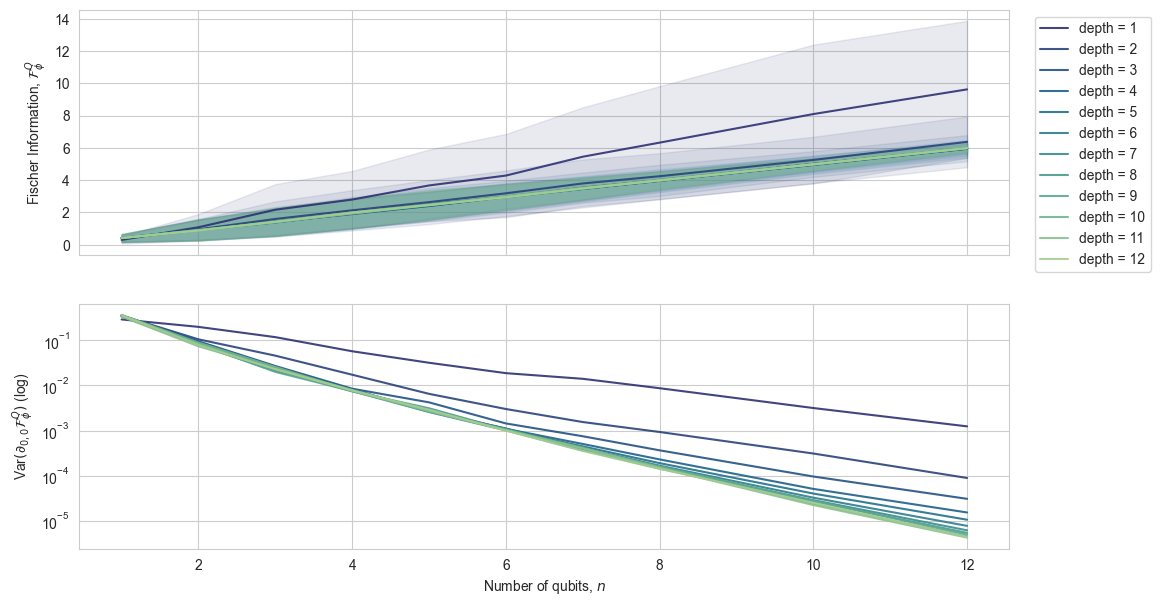

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=[12, 7])
colors = sns.color_palette("crest_r", as_cmap=True)
norm = lambda x: (x - np.min(ks))/(np.max(ks) - np.min(ks))

for i, k in enumerate(ks):
    # color = colors[i]
    color = colors(norm(k))
    label = f"depth = {k}"

    fi_mean, fi_var = [], []
    grads_avg_variance = []
    for n in ns:
        df = data[n][k]

        fi_mean.append(
            np.mean(df["vals"][0])
        )
        fi_var.append(
            np.var(df["vals"][0])
        )

        fi_grad_vals = df["grads"][0] / n**2
        grad_var = np.var(fi_grad_vals, axis=0)
        # grad_var = np.array([[n**2 * np.exp(-n / k)]])
        grads_avg_variance.append(grad_var[0, 0])
        # grads_avg_variance.append(np.mean(grad_var))

    axs[0].plot(ns, fi_mean, label=label, color=color, alpha=0.9)
    axs[0].fill_between(ns, fi_mean - np.sqrt(fi_var), fi_mean + np.sqrt(fi_var), color=color, alpha=0.1)
    axs[0].set(ylabel="Fischer Information, $\mathcal{F}^Q_\phi$")

    axs[1].plot(ns, grads_avg_variance, label=label, color=color, alpha=0.9)

    axs[1].set(ylabel=r"Var$(\partial_{0, 0} \mathcal{F}^Q_\phi)$ (log)")
    axs[1].set(yscale="log")

    axs[0].legend(loc='upper left', bbox_to_anchor=(1.02, 1), ncol=1)
    axs[-1].set(xlabel="Number of qubits, $n$")
plt.show()

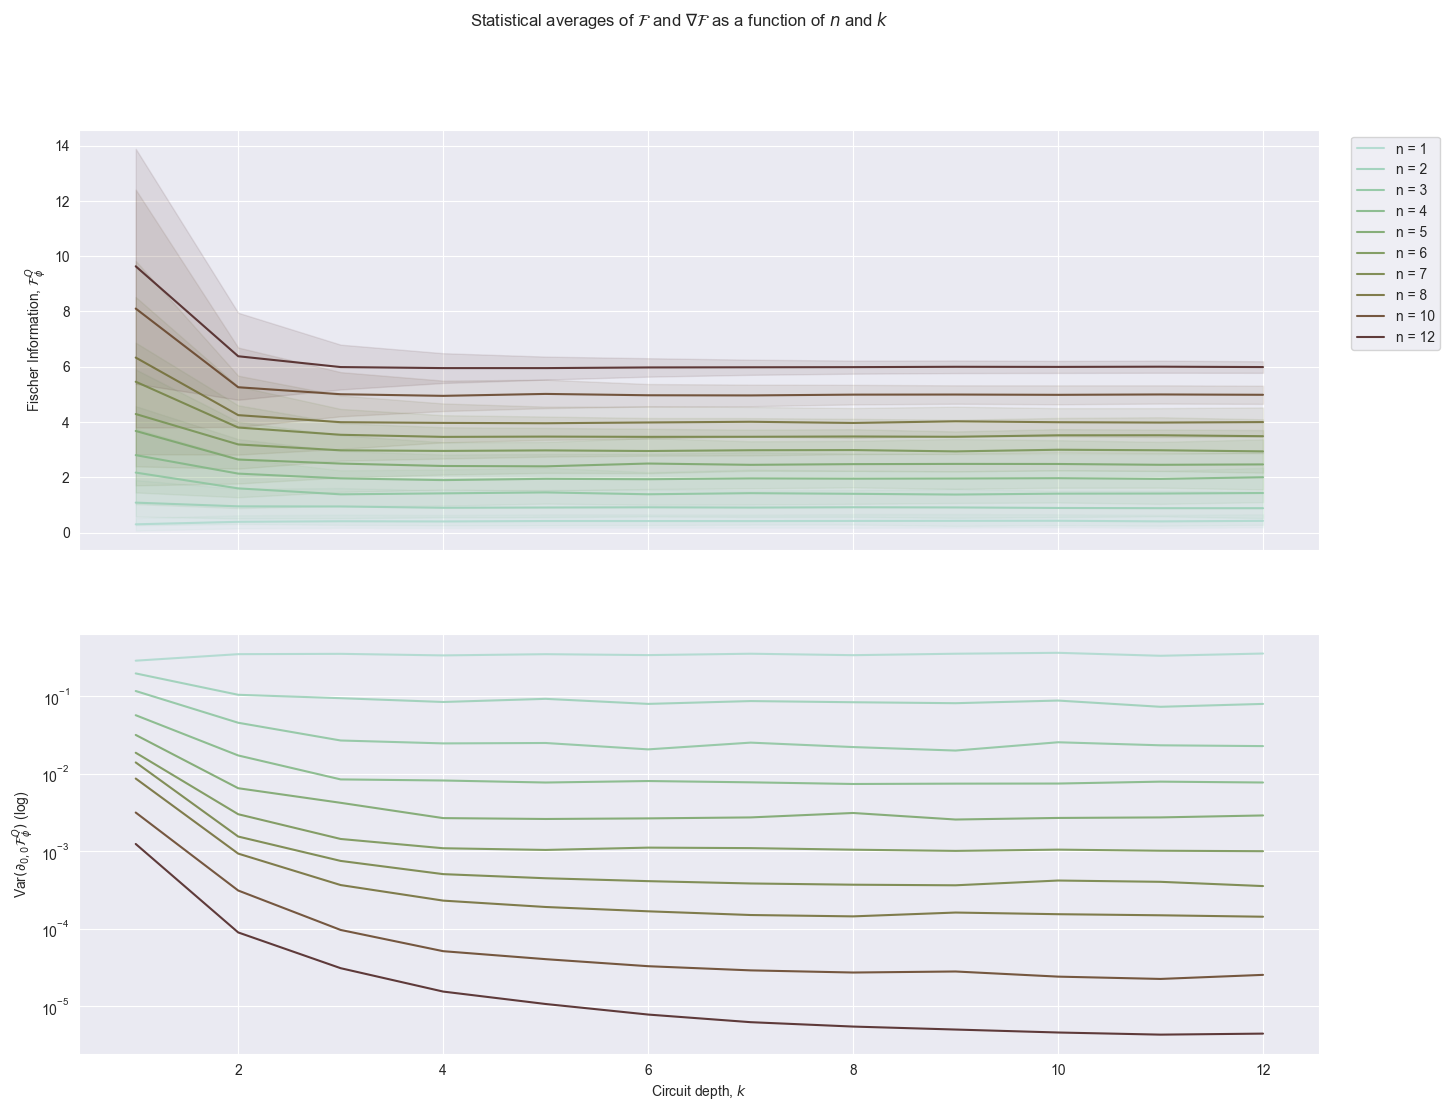

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=[16, 12])
colors = sns.cubehelix_palette(start=0.5, rot=0.75, dark=0.2, light=.8, as_cmap=True)
norm = lambda x: (x - np.min(ks))/(np.max(ks) - np.min(ks))

for i, n in enumerate(ns):
    color = colors(norm(n))

    fi_mean, fi_var = [], []
    grads_avg_variance = []
    for k in ks:
        df = data[n][k]

        fi_mean.append(
            np.mean(df["vals"][0])
        )
        fi_var.append(
            np.var(df["vals"][0])
        )

        fi_grad_vals = df["grads"][0] / n**2
        grad_var = np.var(fi_grad_vals, axis=0)

        grads_avg_variance.append(grad_var[0, 0])
        # grads_avg_variance.append(np.mean(grad_var))

    axs[0].plot(ks, fi_mean, label=f"n = {n}", color=color, alpha=0.9)
    axs[0].fill_between(ks, fi_mean - np.sqrt(fi_var), fi_mean + np.sqrt(fi_var), color=color, alpha=0.1)
    axs[0].set(ylabel="Fischer Information, $\mathcal{F}^Q_\phi$")

    axs[1].plot(ks, grads_avg_variance, label=f"n = {n}", color=color, alpha=0.9)
    axs[1].set(ylabel=r"Var$(\partial_{0, 0} \mathcal{F}^Q_\phi)$ (log)")
    axs[1].set(yscale="log")

    axs[0].legend(loc='upper left', bbox_to_anchor=(1.02, 1), ncol=1)
    axs[-1].set(xlabel="Circuit depth, $k$")

fig.suptitle(r"Statistical averages of $\mathcal{F}$ and $\nabla\mathcal{F}$ as a function of $n$ and $k$")
plt.show()